In [86]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import ModelCheckpoint,EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [87]:
df=pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [89]:
x=df.drop(['Id','Species'],axis=1)
x.head(2)
y=df['Species']
y.head(1)


0    Iris-setosa
Name: Species, dtype: object

In [90]:
y.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [91]:
one=OneHotEncoder()
y=one.fit_transform(np.array(y).reshape(-1,1))
y.shape


(150, 3)

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4


In [93]:
x_train.shape


(120, 4)

In [94]:
y_train.shape

(120, 3)

In [95]:
x_test.shape

(30, 4)

In [96]:
y_test.shape

(30, 3)

In [97]:
x_train.shape[1]


4

In [98]:
model=Sequential() 
model.add(Dense(128, input_dim=x_train.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.15))


model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
          

model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               640       
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                

In [99]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks = [EarlyStopping(patience=2,monitor='val_loss',mode='auto')]
print('training...')
hist=model.fit(x_train,y_train,batch_size=10,epochs=100,validation_data=(x_test,y_test))

training...
Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 1.0980 - accuracy: 0.4250 - val_loss: 0.8152 - val_accuracy: 0.4000
Epoch 2/100
120/120 [==============================] - 0s 286us/step - loss: 0.7710 - accuracy: 0.6333 - val_loss: 0.5461 - val_accuracy: 0.7667
Epoch 3/100
120/120 [==============================] - 0s 241us/step - loss: 0.5857 - accuracy: 0.7500 - val_loss: 0.4543 - val_accuracy: 0.9667
Epoch 4/100
120/120 [==============================] - 0s 233us/step - loss: 0.4783 - accuracy: 0.7833 - val_loss: 0.3930 - val_accuracy: 1.0000
Epoch 5/100
120/120 [==============================] - 0s 241us/step - loss: 0.4808 - accuracy: 0.7833 - val_loss: 0.3484 - val_accuracy: 1.0000
Epoch 6/100
120/120 [==============================] - 0s 233us/step - loss: 0.4006 - accuracy: 0.8333 - val_loss: 0.3125 - val_accuracy: 1.0000
Epoch 7/100
120/120 [==============================] - 0s 224us/step - loss

Epoch 57/100
120/120 [==============================] - 0s 258us/step - loss: 0.0842 - accuracy: 0.9583 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 58/100
120/120 [==============================] - 0s 249us/step - loss: 0.0819 - accuracy: 0.9667 - val_loss: 0.0737 - val_accuracy: 1.0000
Epoch 59/100
120/120 [==============================] - 0s 241us/step - loss: 0.0869 - accuracy: 0.9750 - val_loss: 0.1163 - val_accuracy: 0.9000
Epoch 60/100
120/120 [==============================] - 0s 224us/step - loss: 0.0958 - accuracy: 0.9667 - val_loss: 0.0753 - val_accuracy: 0.9667
Epoch 61/100
120/120 [==============================] - 0s 233us/step - loss: 0.1427 - accuracy: 0.9583 - val_loss: 0.1197 - val_accuracy: 0.9000
Epoch 62/100
120/120 [==============================] - 0s 249us/step - loss: 0.0812 - accuracy: 0.9833 - val_loss: 0.0516 - val_accuracy: 1.0000
Epoch 63/100
120/120 [==============================] - 0s 249us/step - loss: 0.0791 - accuracy: 0.9833 - val_loss: 0.0546 -

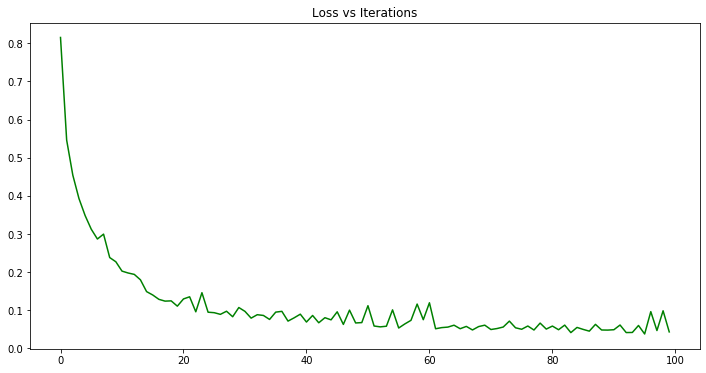

In [100]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.title("Loss vs Iterations")
plt.plot(np.arange(100),hist.history['val_loss'],color='green')
plt.show()

In [101]:
print('generating predictions...')
preds=model.predict_classes(x_test)
print("predictions:",preds)

generating predictions...
predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [106]:
model.predict(x_test)


array([[5.89309020e-05, 9.81983781e-01, 1.79574061e-02],
       [9.99976873e-01, 2.31798058e-05, 2.83517174e-15],
       [5.16821091e-12, 1.63694771e-04, 9.99836326e-01],
       [7.96293534e-05, 9.62194920e-01, 3.77254784e-02],
       [2.89856944e-05, 9.93836820e-01, 6.13411330e-03],
       [9.99942183e-01, 5.78663567e-05, 3.80781324e-14],
       [2.60984572e-03, 9.97264981e-01, 1.25135863e-04],
       [2.09634393e-07, 4.43794802e-02, 9.55620289e-01],
       [1.06670495e-05, 5.57738900e-01, 4.42250431e-01],
       [6.69062429e-04, 9.98884857e-01, 4.46004589e-04],
       [1.52873031e-06, 1.55247465e-01, 8.44751000e-01],
       [9.99893904e-01, 1.06046231e-04, 2.71690765e-13],
       [9.99987245e-01, 1.27907797e-05, 1.17250239e-15],
       [9.99895334e-01, 1.04675855e-04, 2.11622346e-13],
       [9.99978900e-01, 2.11231163e-05, 7.37150074e-15],
       [9.57230004e-05, 9.92510557e-01, 7.39367027e-03],
       [1.24112598e-09, 1.21130189e-03, 9.98788774e-01],
       [4.93897067e-04, 9.98252

In [108]:
one.categories_

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]